Задание 1.1 

Загрузите первый лист (curr) из файла data.xlsx в pd.DataFrame (в этой таблице приведены курсы доллара (USD) и евро (EUR) в рублях).

In [131]:
import pandas as pd
import numpy as np

In [155]:
df = pd.read_excel('data_hw6.2.xlsx', sheetname='curr',)
df

,Date,USD,EUR
0,2013-06-22,32.7433,43.3489
1,2013-06-25,32.9097,43.1018
2,2013-06-26,32.7140,42.9698
3,2013-06-27,32.8876,42.9841
4,2013-06-28,32.8766,42.8349
5,2013-06-29,32.7090,42.7180
6,2013-07-02,32.8517,42.8025
7,2013-07-03,32.9475,43.0525
8,2013-07-04,33.2204,43.0736
9,2013-07-05,33.1605,43.0954


Задание 1.2 

Выведите на экран тип поля Date. Если это datetime64[ns] или <M8[ns] (по сути то же самое), то мы имеем дело с правильным форматом даты. Если нет, приведите этот столбец к типу datetime.


In [133]:
df.dtypes.Date

dtype('<M8[ns]')

Задание 1.3 

Выведите на экран минимальную и максимальную дату. Сколько всего дней содержится в наших данных? (Hint: даты можно вычитать друг из друга)


In [134]:
df.Date.min()

Timestamp('2013-06-22 00:00:00')

In [135]:
df.Date.max()

Timestamp('2017-06-21 00:00:00')

In [136]:
df.Date.count()
#использовать df.Date.max() - df.Date.min() некорректно, так как в наших данных отсутствуют выходные и праздники
#зная что в столбце Date только уникальные значения, можно использовать простой count

988

Задание 1.4 

Постройте на одном графике курс доллара и курс евро.


In [137]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (19.0, 6.0)
matplotlib.pyplot.style.use('ggplot')

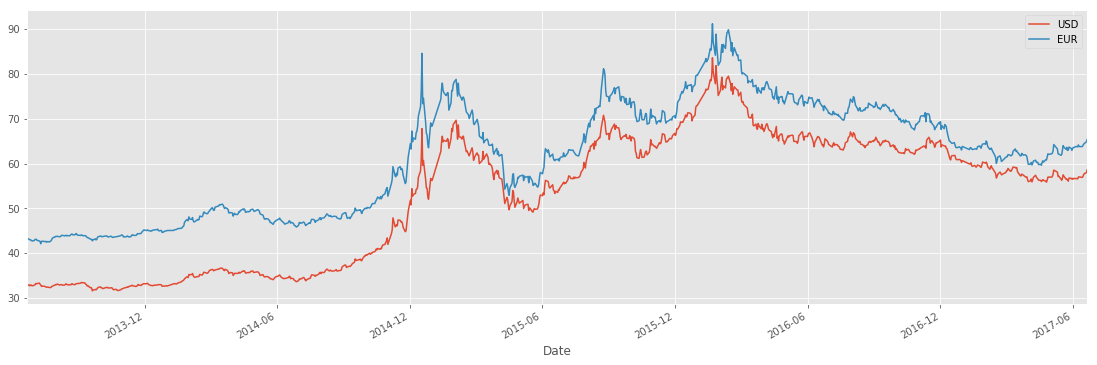

In [138]:
df.plot(x=df.Date)

Задание 1.5 

Найдите среднее значение курса евро в мае 2017 года.

In [139]:
df.loc[df.Date.between(left='2017-05-01',right='2017-05-31', ),'EUR'].mean()

62.95527368421053

Задание 2.1 

Найдите долю дней, когда доллар растет

In [140]:
len(list(x for x in xrange (1,df.Date.count()) if df.USD.values[x-1]<df.USD.values[x]))/float(df.Date.count())

0.5263157894736842

Задание 2.2

Постройте гистограмму доходности доллара.

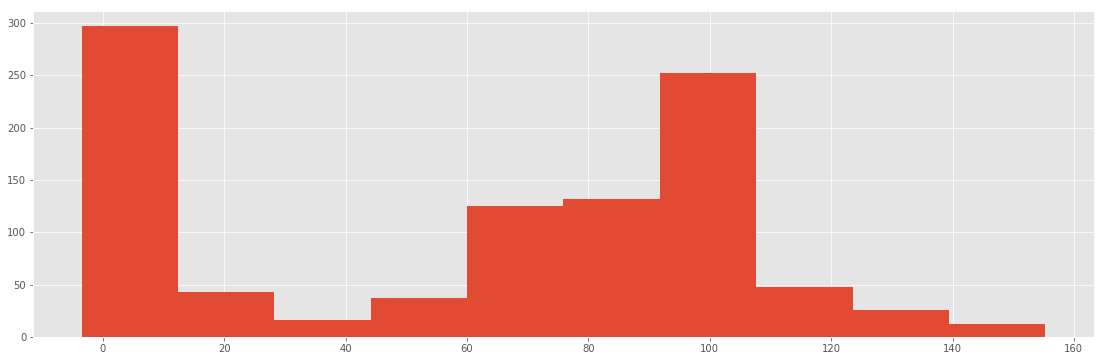

In [141]:
(df.USD/df.USD[0]*100-100).hist()
#здесь образуется группировку по количеству случаев, когда доходность была в одном из диапазонов


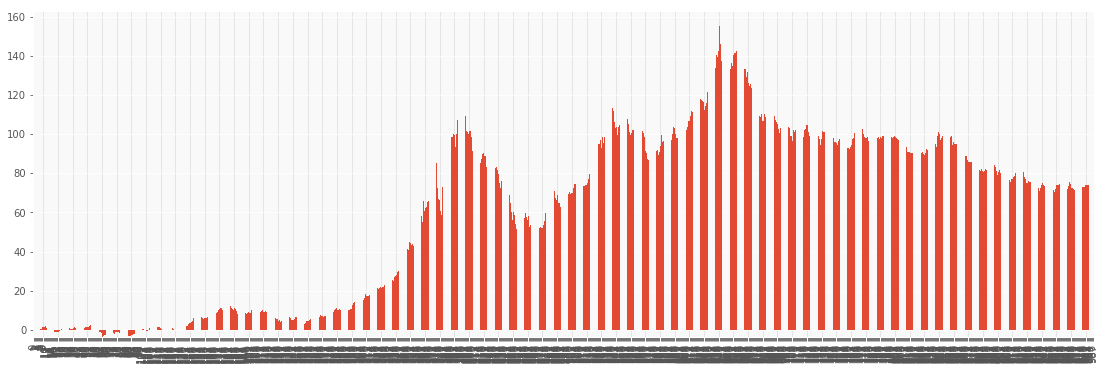

In [142]:
(df.USD/df.USD[0]*100-100).plot(kind='bar')
#постоить график в видео гистограммы удалось, но немного криво

Задание 2.3

Добавьте в таблицу новую колонку Weekday – день недели на русском языке, т.е. строку со значением u'понедельник', u'вторник' и т.д. (Hint: удобно воспользоваться атрибутом .dt)

In [158]:
df['Weekday']=df.Date.dt.dayofweek
df.replace({'Weekday':{0: u'понедельник', 1: u'вторник',2: u'среда',3: u'четверг',4: u'пятница',5: u'суббота',6: u'воскресенье'}}, inplace=True)
df

,Date,USD,EUR,Weekday
0,2013-06-22,32.7433,43.3489,суббота
1,2013-06-25,32.9097,43.1018,вторник
2,2013-06-26,32.7140,42.9698,среда
3,2013-06-27,32.8876,42.9841,четверг
4,2013-06-28,32.8766,42.8349,пятница
5,2013-06-29,32.7090,42.7180,суббота
6,2013-07-02,32.8517,42.8025,вторник
7,2013-07-03,32.9475,43.0525,среда
8,2013-07-04,33.2204,43.0736,четверг
9,2013-07-05,33.1605,43.0954,пятница


Задание 2.4 

Рассчитайте корреляцию между курсами доллара и евро за весь доступный период (Hint: в pandas уже встроена функция для расчета корреляций).

In [157]:
df.corr(method='pearson', min_periods=1)

,USD,EUR
USD,1.000000,0.982309
EUR,0.982309,1.000000


Задание 2.5 

Несколько лет назад курс евро отличался от курса доллара значительно сильнее, чем сейчас. Чтобы это визуализировать, вычислите курс евро к доллару (т.е. "сколько долларов стоит один евро") за каждый день. Постройте график курса евро к доллару за весь доступный период.

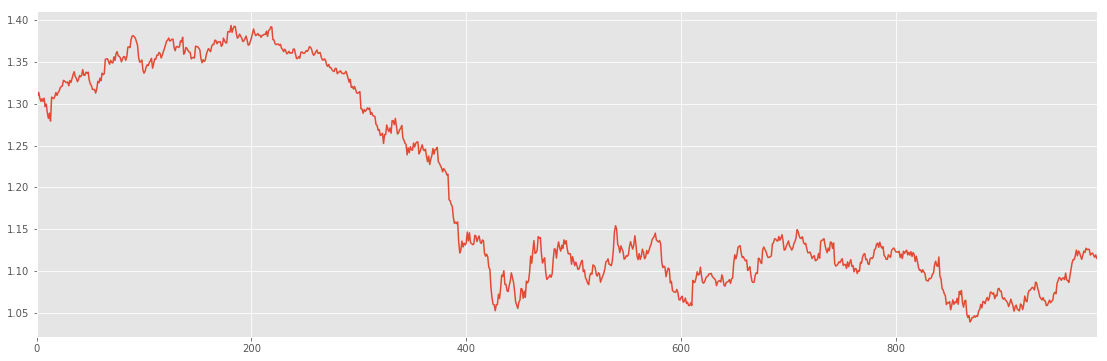

In [159]:
(df.EUR/df.USD).plot(x=df.Date)

Задание 3.1 

Загрузите второй лист (oil) из файла data.xlsx в pd.DataFrame (в этой таблице приведены цены за баррель нефти Brent в долларах США).

In [160]:
df1=pd.read_excel('data_hw6.2.xlsx', sheetname='oil',)
df1

,dt,Brent
0,2013-01-02,112.98
1,2013-01-03,113.03
2,2013-01-04,112.58
3,2013-01-07,112.49
4,2013-01-08,113.03
5,2013-01-09,113.07
6,2013-01-10,112.97
7,2013-01-11,110.30
8,2013-01-14,111.32
9,2013-01-15,111.72


Задание 3.2 

Объедините обе таблицы в одну. Итоговая таблица должна содержать дату в качестве индекса, а также поля USD (доллар), EUR (евро) и Brent (нефть). Обратите внимание, что периоды, за которые доступны данные, немного отличаются для курсов валют и для нефти. Нас интересует только тот период, когда и те, и другие данные присутствуют.

In [161]:
df.set_index('Date', inplace=True)

In [162]:
df1.set_index('dt',inplace =True)

In [163]:
df.head(5),df1.head(5)

(                USD      EUR  Weekday
 Date                                 
 2013-06-22  32.7433  43.3489  суббота
 2013-06-25  32.9097  43.1018  вторник
 2013-06-26  32.7140  42.9698    среда
 2013-06-27  32.8876  42.9841  четверг
 2013-06-28  32.8766  42.8349  пятница,              Brent
 dt                
 2013-01-02  112.98
 2013-01-03  113.03
 2013-01-04  112.58
 2013-01-07  112.49
 2013-01-08  113.03)

In [164]:
dfr=pd.concat([df,df1],axis=1,join='inner')
dfr

,USD,EUR,Weekday,Brent
2013-06-25,32.9097,43.1018,вторник,101.51
2013-06-26,32.7140,42.9698,среда,100.62
2013-06-27,32.8876,42.9841,четверг,102.74
2013-06-28,32.8766,42.8349,пятница,102.49
2013-07-02,32.8517,42.8025,вторник,103.96
2013-07-03,32.9475,43.0525,среда,106.12
2013-07-05,33.1605,43.0954,пятница,107.46
2013-07-09,33.3210,42.7342,вторник,107.90
2013-07-10,33.0842,42.6389,среда,108.43
2013-07-11,32.9112,42.1033,четверг,108.18


Задание 3.3 

*Постройте на одном графике курсы валют и цены не нефть. Поскольку цена на нефть имеет немного другой масштаб, используйте параметр secondary_y='Brent' для отображения дополнительной оси $y$ справа.

*Посчитайте попарные корреляции всех трех временных рядов за весь период.

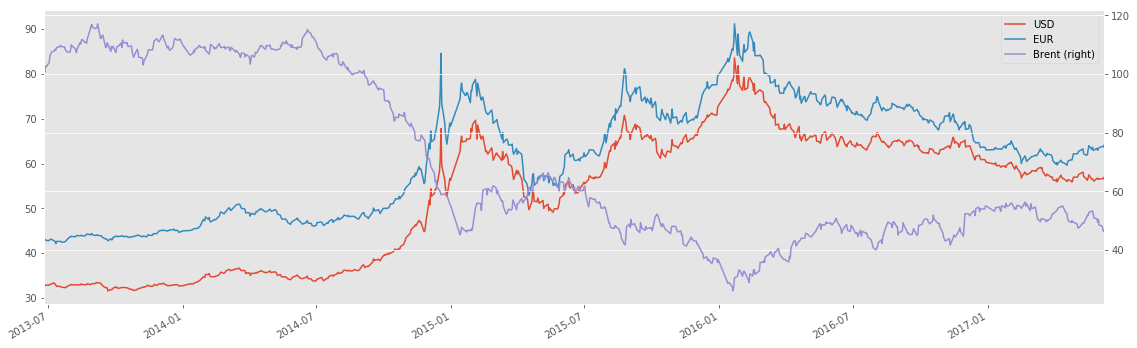

In [167]:
dfprint=dfr[['USD','EUR','Brent']]
dfprint.plot(secondary_y='Brent')

In [166]:
dfprint.corr(method='pearson', min_periods=1)

,USD,EUR,Brent
USD,1.000000,0.982142,-0.978950
EUR,0.982142,1.000000,-0.938919
Brent,-0.978950,-0.938919,1.000000


Задание 3.4 

Определите, в какие дни недели лучше покупать евро, а в какие – продавать. Для этого рассчитайте среднюю доходность евро в разные дни недели (т.е. нужно сгруппировать таблицу по дням недели и рассчитать среднее процентное изменение курса евро в каждой группе).

In [190]:
dfr['EURyi']=[0]+list((1-dfr.EUR.values[x-1]/dfr.EUR.values[x])*100 for x in xrange (1,dfr.EUR.count()))
#в начало добавляем 0, так как изменений по первому элементу нет
dfr.groupby('Weekday').EURyi.mean()
#вывод: лучше закупаться в пятницу, а продавать во вторник

Weekday
вторник    0.283538
пятница   -0.198460
среда      0.067834
четверг    0.002186
Name: EURyi, dtype: float64

Задание 3.5 

Постройте график "скользящей корреляции" между курсами доллара и евро (таким образом можно найти периоды, когда курсы коррелировали слабее обычного и использовать это для арбитража). Для этого нужно взять скользящее окно (например, 60 последних значений) и рассчитать корреляцию USD - EUR внутри каждого такого окна.

In [315]:
#находим значения скользящей корреляции для 60-ти дневного окна и добавляем его в dfr чтобы потом отобразить на графике
dfr['EUcor']=list((dfr[x:x+60])[['USD','EUR']].corr()["EUR"].values[0] for x in xrange (0,dfr.EUR.count()))

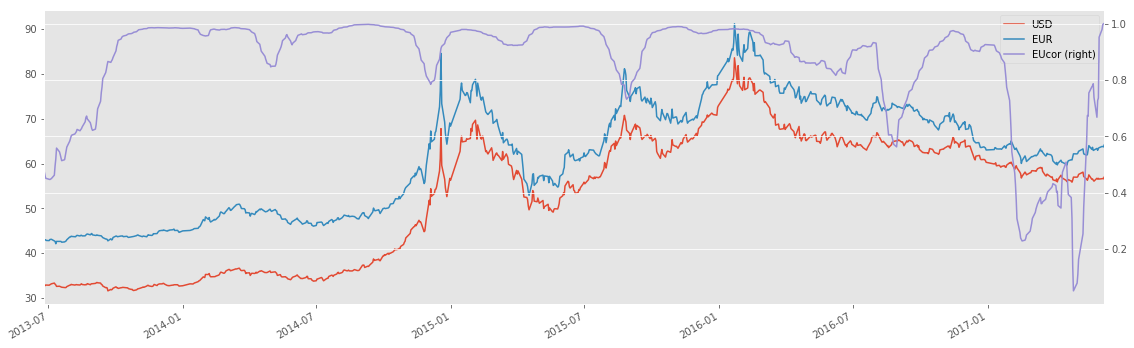

In [316]:
dfr[['USD','EUR','EUcor']].plot(secondary_y='EUcor')